In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
malaria = pd.read_csv('malaria_prediction.csv')

In [149]:
malaria.shape

(1000, 18)

In [150]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,Male,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,yes,no,no
1,1,Male,no,no,yes,yes,yes,no,no,no,no,no,yes,no,no,no,no,no
2,0,Female,yes,no,no,yes,no,yes,no,yes,yes,no,no,yes,yes,no,no,no
3,1,Female,yes,yes,yes,no,yes,no,no,no,no,yes,yes,yes,yes,no,yes,no
4,1,Female,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes,no,no,no,no


In [151]:
values = {"fever":{"no":0, "yes":1},"cold":{"no":0, "yes":1},"rigor":{"no":0, "yes":1},"fatigue":{"no":0, "yes":1},
          "headace":{"no":0, "yes":1},"bitter_tongue":{"no":0, "yes":1},"vomitting":{"no":0, "yes":1},
          "diarrhea":{"no":0, "yes":1},"Convulsion":{"no":0, "yes":1},"Anemia":{"no":0, "yes":1},"jundice":{"no":0, "yes":1},
          "cocacola_urine":{"no":0, "yes":1},"hypoglycemia":{"no":0, "yes":1},"prostraction":{"no":0, "yes":1},
          "hyperpyrexia":{"no":0, "yes":1},"hyperpyrexia":{"no":0, "yes":1},"severe_maleria":{"no":0, "yes":1}}

malaria.replace(values,inplace=True)

In [152]:
y = malaria['severe_maleria']

In [153]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: severe_maleria, dtype: int64

In [154]:
new_malaria = malaria.drop('severe_maleria', axis=1)

In [163]:
new_malaria.head()

,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,sex_Female,sex_Male
0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
3,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,1,0
4,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0


In [157]:
new_malaria = pd.get_dummies(new_malaria)

In [158]:
new_malaria = new_malaria.drop('age', axis=1)

In [159]:
print(malaria.groupby('severe_maleria').size())

severe_maleria
0    677
1    323
dtype: int64


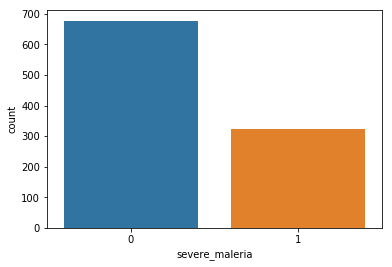

In [162]:
import seaborn as sns

sns.countplot(malaria['severe_maleria'],label="Count")

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_malaria, y, test_size=0.3, random_state=0)

# k-Nearest Neighbors

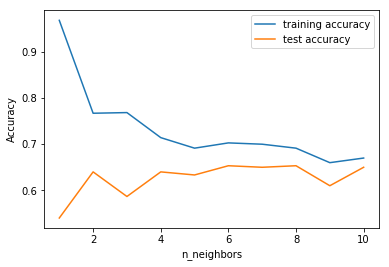

In [165]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [174]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.65


# Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.674
Test set accuracy: 0.683


In [182]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.674
Test set accuracy: 0.683


In [190]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.00001).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.674
Test set accuracy: 0.683


### Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.607


In [200]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.674
Accuracy on test set: 0.683


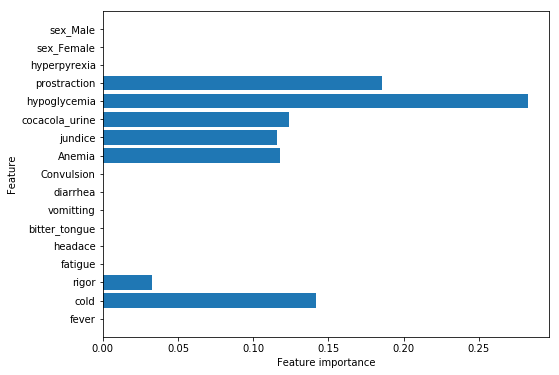

In [204]:
malaria_features = [x for i,x in enumerate(new_malaria.columns) if i!=17]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 17
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), malaria_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

### Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.620


In [224]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.674
Accuracy on test set: 0.683


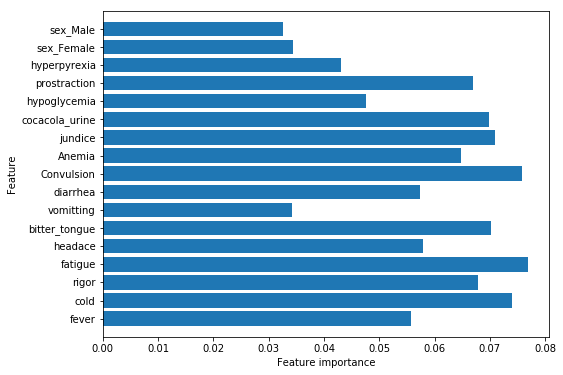

In [228]:
plot_feature_importances_diabetes(rf)

### Gradient Boosting

In [229]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.717
Accuracy on test set: 0.623


In [231]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.674
Accuracy on test set: 0.683


In [232]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.674
Accuracy on test set: 0.683


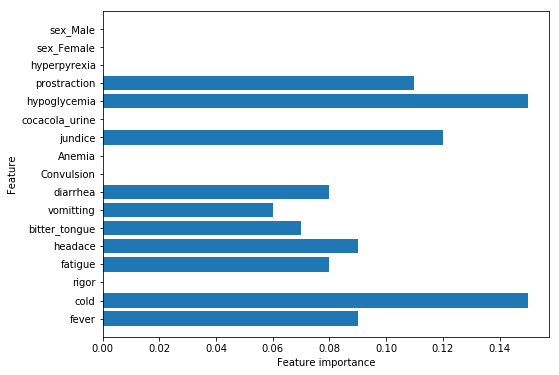

In [235]:
plot_feature_importances_diabetes(gb1)

##  Support Vector Machine

In [236]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.67
Accuracy on test set: 0.68


In [237]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.67
Accuracy on test set: 0.68


In [240]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.677
Accuracy on test set: 0.680


## Neural Network

In [241]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.63


C:\Users\mo.yosiwealth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
kmNeuro = KMeans(n_clusters=2)

data['Clus'] = km.fit_predict(new_data)

In [127]:
new_data.head()

,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,sex_Female,sex_Male,Clus
0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1
1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1
2,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0
3,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,1,0,0
4,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0


In [122]:
pd.crosstab(y, km.labels_)

col_0,0,1
severe_maleria,,
0,300,377
1,154,169
